# Graph Generation

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Raw

Let's consider how the raw signals look like:

In [3]:
stepRaw = pd.read_csv("stepRaw.csv")
[plt.plot(stepRaw.time, stepRaw[i], label=i) for i in stepRaw.columns[stepRaw.columns != "time"]]
plt.legend()

FileNotFoundError: [Errno 2] File b'trueHeadingpRaw.csv' does not exist: b'trueHeadingpRaw.csv'

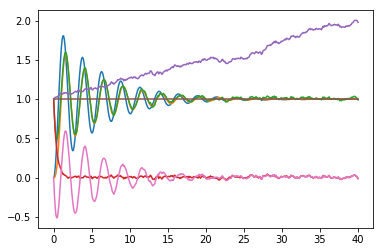

In [4]:
plt.plot(stepRaw.time, stepRaw[stepRaw.columns[stepRaw.columns != "time"]])

## Analytics

Note that if we want to model how the system error changes per 

In [38]:
# Input signal types modelled
signal_types = ["ramp", "step", "sine", "trueHeading"]
full_model_data_raw = pd.DataFrame([])
for i in signal_types:
    for j in os.listdir('cutoffVariations'):
        if j.startswith(i) and j.endswith("Analytics.csv"):
            # Select iteration cutoff frequency from file name
            iteration_cutoff_frequency = j.replace(i, "").replace("Analytics.csv", "").replace("_", ".")
            iteration_read_data = pd.read_csv("./cutoffVariations/" + j)
            # Create cutoff frequency and input signalType columns accordingly
            iteration_read_data.loc[:, 'cutoffFrequency'] = np.array([iteration_cutoff_frequency] * len(iteration_read_data))
            iteration_read_data.loc[:, 'signalType'] = np.array([i] * len(iteration_read_data))
            # Append into model
            full_model_data_raw = full_model_data_raw.append(iteration_read_data, ignore_index=True)
full_model_data_raw

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,cutoffFrequency,firstMomentSignals,fourthMomentSignals,kurtosisCorrelationSignals,kurtosisSignals,maxCorrelationSignals,maxSignals,meanCorrelationSignals,meanSignals,minSignals,...,rmsSignals,secondMomentSignals,signalType,signalsNamesOrdered,skewnessSignals,standardDeviationSignals,standardDeviationSignals_1,thirdMomentSignals,varCorrelationSignals,varianceSignals
0,0.001,0,2.523472e-02,NaN,10.667718,NaN,1.806514,NaN,0.987589,0.000000,...,NaN,0.048637,step,compassSystem,-1.063682,0.220810,NaN,-1.140925e-02,NaN,0.048757
1,0.001,0,3.111586e-08,NaN,1.800954,NaN,0.039160,NaN,0.019485,0.000000,...,NaN,0.000131,step,compassFilter,-0.014549,0.011479,NaN,-2.192460e-08,NaN,0.000132
2,0.001,0,1.162169e-02,NaN,1.902266,NaN,1.984776,NaN,1.481105,1.000000,...,NaN,0.078163,step,fullSystem,0.161618,0.279922,NaN,3.531730e-03,NaN,0.078356
3,0.001,0,9.868096e-03,NaN,1.906519,NaN,1.946001,NaN,1.461620,1.000000,...,NaN,0.071944,step,gyroFilter,0.169748,0.268556,NaN,3.275662e-03,NaN,0.072122
4,0.001,0,1.257771e-02,NaN,1.902507,NaN,2.003874,NaN,1.487665,1.000000,...,NaN,0.081309,step,gyroSystem,0.171984,0.285500,NaN,3.987439e-03,NaN,0.081510
5,0.001,0,0.000000e+00,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,...,NaN,0.000000,step,input,NaN,0.000000,NaN,0.000000e+00,NaN,0.000000
6,0.001,0,1.162169e-02,NaN,1.902266,NaN,0.984776,NaN,0.481105,0.000000,...,NaN,0.078163,step,error,0.161618,0.279922,NaN,3.531730e-03,NaN,0.078356
7,0.051495,0,2.517409e-02,NaN,10.694505,NaN,1.806514,NaN,0.987622,0.000000,...,NaN,0.048517,step,compassSystem,-1.065432,0.220538,NaN,-1.138599e-02,NaN,0.048637
8,0.051495,0,9.316034e-03,NaN,2.350356,NaN,0.872244,NaN,0.569917,0.000000,...,NaN,0.062958,step,compassFilter,-0.706783,0.251223,NaN,-1.116501e-02,NaN,0.063113
9,0.051495,0,4.891528e-04,NaN,2.222498,NaN,1.477416,NaN,1.271722,1.000000,...,NaN,0.014835,step,fullSystem,-0.261697,0.121951,NaN,-4.728797e-04,NaN,0.014872


In [5]:
# Create multiIndex for all model signals signalsNamesOrdered and input signalType
full_model_multiIndex = pd.MultiIndex.from_frame(full_model_data_raw.loc[:, ["signalsNamesOrdered","signalType"]])
# Remove index columns from DataFrame
full_model_data = full_model_data_raw.loc[:, (full_model_data_raw.columns != "signalsNamesOrdered") \
                                                       & (full_model_data_raw.columns != "signalType")].set_index(full_model_multiIndex)
full_model_data

,,cutoffFrequency,firstMomentSignals,fourthMomentSignals,kurtosisCorrelationSignals,kurtosisSignals,maxCorrelationSignals,maxSignals,meanCorrelationSignals,meanSignals,minSignals,...,powerSignals,rmsCorrelationSignals,rmsSignals,secondMomentSignals,skewnessSignals,standardDeviationSignals,standardDeviationSignals_1,thirdMomentSignals,varCorrelationSignals,varianceSignals
signalsNamesOrdered,signalType,,,,,,,,,,,,,,,,,,,,,
compassSystem,step,0.001,0,2.523472e-02,NaN,10.667718,NaN,1.806514,NaN,0.987589,0.000000,...,NaN,NaN,NaN,0.048637,-1.063682,0.220810,NaN,-1.140925e-02,NaN,0.048757
compassFilter,step,0.001,0,3.111586e-08,NaN,1.800954,NaN,0.039160,NaN,0.019485,0.000000,...,NaN,NaN,NaN,0.000131,-0.014549,0.011479,NaN,-2.192460e-08,NaN,0.000132
fullSystem,step,0.001,0,1.162169e-02,NaN,1.902266,NaN,1.984776,NaN,1.481105,1.000000,...,NaN,NaN,NaN,0.078163,0.161618,0.279922,NaN,3.531730e-03,NaN,0.078356
gyroFilter,step,0.001,0,9.868096e-03,NaN,1.906519,NaN,1.946001,NaN,1.461620,1.000000,...,NaN,NaN,NaN,0.071944,0.169748,0.268556,NaN,3.275662e-03,NaN,0.072122
gyroSystem,step,0.001,0,1.257771e-02,NaN,1.902507,NaN,2.003874,NaN,1.487665,1.000000,...,NaN,NaN,NaN,0.081309,0.171984,0.285500,NaN,3.987439e-03,NaN,0.081510
input,step,0.001,0,0.000000e+00,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,...,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000e+00,NaN,0.000000
error,step,0.001,0,1.162169e-02,NaN,1.902266,NaN,0.984776,NaN,0.481105,0.000000,...,NaN,NaN,NaN,0.078163,0.161618,0.279922,NaN,3.531730e-03,NaN,0.078356
compassSystem,step,0.051495,0,2.517409e-02,NaN,10.694505,NaN,1.806514,NaN,0.987622,0.000000,...,NaN,NaN,NaN,0.048517,-1.065432,0.220538,NaN,-1.138599e-02,NaN,0.048637
compassFilter,step,0.051495,0,9.316034e-03,NaN,2.350356,NaN,0.872244,NaN,0.569917,0.000000,...,NaN,NaN,NaN,0.062958,-0.706783,0.251223,NaN,-1.116501e-02,NaN,0.063113


In [30]:
model_signal_data = full_model_data.loc[pd.IndexSlice[model_signal, signal], :]
model_signal_data["cutoffFrequency"] = pd.to_numeric(model_signal_data.loc[:, "cutoffFrequency"])
model_signal_data.sort_values(by="cutoffFrequency")

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


cutoffFrequency  firstMomentSignals  \
signalsNamesOrdered signalType                                         
input               trueHeading          0.00100                   0   
                    trueHeading          0.10120                   0   
                    trueHeading          0.20140                   0   
                    trueHeading          0.30160                   0   
                    trueHeading          0.40179                   0   
                    trueHeading          0.50199                   0   
                    trueHeading          0.60219                   0   
                    trueHeading          0.70239                   0   
                    trueHeading          0.80259                   0   
                    trueHeading          0.90279                   0   
                    trueHeading          1.00300                   0   
                    trueHeading          1.10320                   0   
                    trueHeading          1.20340                   0   
                    trueHeading          1.30360                   0   
                    trueHeading          1.40380                   0   
                    trueHeading          1.50400                   0   
                    trueHeading          1.60420                   0   
                    trueHeading          1.70440                   0   
                    trueHeading          1.80460                   0   
                    trueHeading          1.90480                   0   
                    trueHeading          2.00500                   0   
                    trueHeading          2.10520                   0   
                    trueHeading          2.20540                   0   
                    trueHeading          2.30560                   0   
                    trueHeading          2.40580                   0   
                    trueHeading          2.50600                   0   
                    trueHeading          2.60620                   0   
                    trueHeading          2.70640                   0   
                    trueHeading          2.80660                   0   
                    trueHeading          2.90680                   0   
...                                          ...                 ...   
                    trueHeading         18.17420                   0   
                    trueHeading         18.30300                   0   
                    trueHeading         18.43180                   0   
                    trueHeading         18.56060                   0   
                    trueHeading         18.68940                   0   
                    trueHeading         18.81820                   0   
                    trueHeading         18.94700                   0   
                    trueHeading         19.07580                   0   
                    trueHeading         19.20450                   0   
                    trueHeading         19.33330                   0   
                    trueHeading         19.46210                   0   
                    trueHeading         19.59090                   0   
                    trueHeading         19.71970                   0   
                    trueHeading         19.84850                   0   
                    trueHeading         19.97730                   0   
                    trueHeading         20.10610                   0   
                    trueHeading         20.23480                   0   
                    trueHeading         20.36360                   0   
                    trueHeading         20.49240                   0   
                    trueHeading         20.62120                   0   
                    trueHeading         20.75000                   0   
                    trueHeading         20.87880                   0   
                    trueHeading         21.00760                   0   
 

signalsNamesOrdered  signalType 
compassFilter        trueHeading     0.00100
                     trueHeading     0.10120
                     trueHeading     0.20140
                     trueHeading     0.30160
                     trueHeading     0.40179
                     trueHeading     0.50199
                     trueHeading     0.60219
                     trueHeading     0.70239
                     trueHeading     0.80259
                     trueHeading     0.90279
                     trueHeading    10.02080
                     trueHeading    10.12100
                     trueHeading    10.22120
                     trueHeading    10.32140
                     trueHeading    10.42160
                     trueHeading    10.52180
                     trueHeading    10.62200
                     trueHeading    10.72220
                     trueHeading    10.82240
                     trueHeading    10.92260
                     trueHeading    11.02280
                     t

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

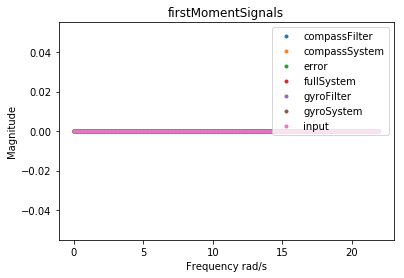

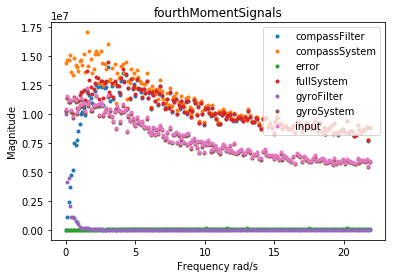

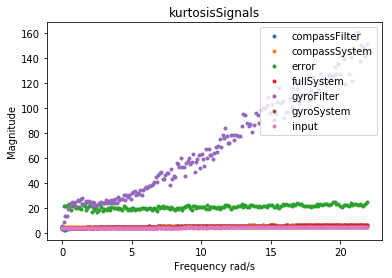

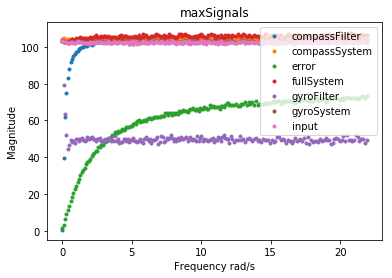

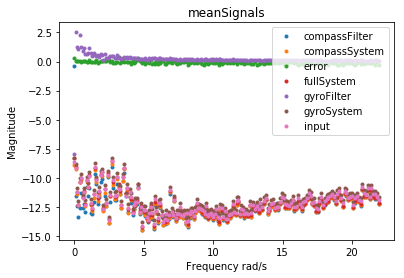

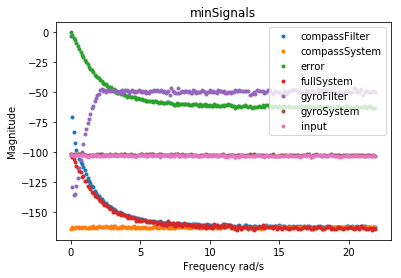

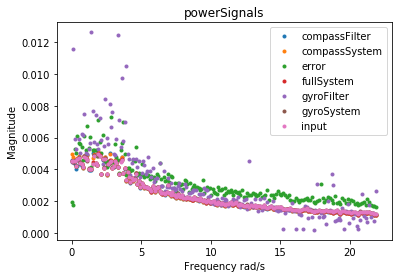

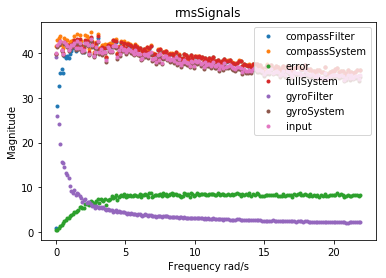

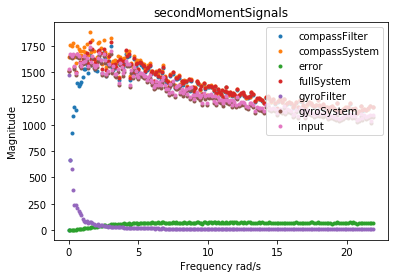

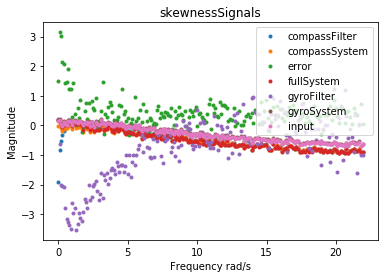

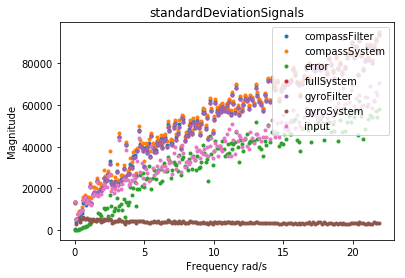

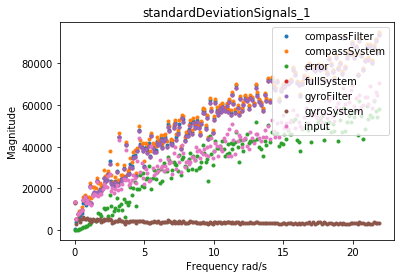

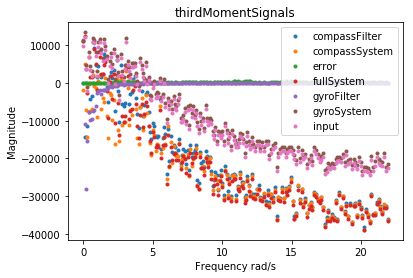

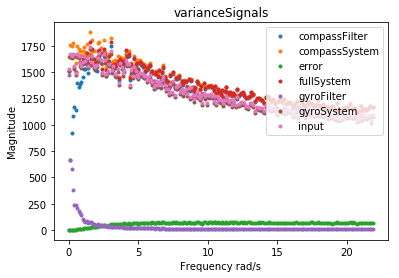

In [47]:
signal = "trueHeading"
i = 0
# Select all analytic metrics except cutoffFrequency
for analytic_metric in full_model_data.columns[full_model_data.columns != "cutoffFrequency"]:
    if analytic_metric.find("Correlation") == -1: # Not selecting rows that do not contain correlations
        for model_signal in full_model_data.index.levels[0]: # model signals signalsNamesOrdered list
            # Index per model signals signalsNamesOrdered for only for one input signalType
            model_signal_data = full_model_data.loc[pd.IndexSlice[model_signal, signal], :] # Surely there must be a more memory efficient way of doing this
            # Convert to numeric
            model_signal_data["cutoffFrequency"] = pd.to_numeric(model_signal_data.loc[:, "cutoffFrequency"])
            model_signal_data.sort_values(by="cutoffFrequency")

            plt.figure(i)
            plt.plot(model_signal_data.cutoffFrequency, model_signal_data[analytic_metric], '.',label=model_signal)
            plt.title(analytic_metric)
            plt.ylabel('Magnitude')
            plt.xlabel('Frequency rad/s')
            # plt.xscale('log')
        i+=1
        plt.legend(loc="upper right")

## Analytics for all signals


So how will we determine the error from each signal accordingly? Let's assume it's propotional. We know the cutoff frequency determines how much of the compass dominates the response, and because its complementary, this also means how much of the gyro is not present in the response. So we want to know what is the error proportionality. We could in theory see the frequency response of the signals that we have, and compare as that changes. Do we have to create our own fast fourier transform response? Let's do it to see what happens.

How do we determine the error proportionality. We can consider a simple step signal case.

It would be inaccurate to linearly substract the value between the error and the 

We can model small UAV data of https://ieeexplore.ieee.org/abstract/document/6095129 and [A minimalist control strategy for small UAVs](https://ieeexplore.ieee.org/abstract/document/5354465), [Understanding Autonomous Drone Maneuverability
for Internet of Things Applications](https://research.csiro.au/ng/wp-content/uploads/sites/106/2016/08/Understanding-Autonomous-cameraready-2017.pdf). Here's the [Phantom 2 datasheet Max Angular Speed	150°/s](https://www.dji.com/uk/phantom-3-pro/info). [Mavic 2 pro Max Angular Velocity	200°/s](https://www.dji.com/uk/mavic-2/info#specs).